# Logistic Regression

We use a classification model to predict which customers will default on their credit card debt. 

## Data

To learn more about the data and all of the data preparation steps, take a look at [this page](/docs/data-credit.ipynb). Here, we simply import the prepared data:

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/kirenz/classification/main/_static/data/default-prepared.csv')

In [2]:
# preparation of label and features
y = df['default_Yes']
X = df.drop(columns = 'default_Yes')

### Data split

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

## Model

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
clf = LogisticRegression()

In [6]:
clf.fit(X_train, y_train)

LogisticRegression()

In [7]:
y_pred = clf.predict(X_test)

In [8]:
# Return the mean accuracy on the given test data and labels:
clf.score(X_test, y_test)

0.968

### Confusion matrix

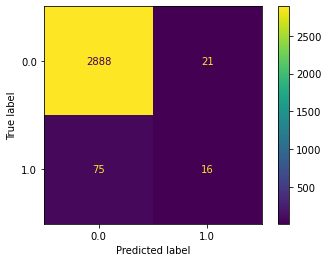

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

### Classification report

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2909
           1       0.43      0.18      0.25        91

    accuracy                           0.97      3000
   macro avg       0.70      0.58      0.62      3000
weighted avg       0.96      0.97      0.96      3000



### ROC Curve

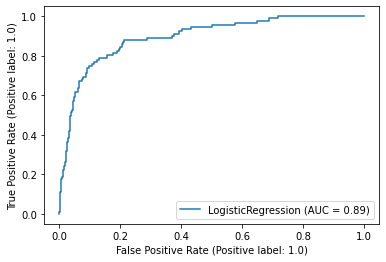

In [13]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X_test, y_test);

### AUC Score

In [43]:
from sklearn.metrics import roc_auc_score

In [46]:
roc_auc_score(y_test, clf.decision_function(X_test))

0.9008344697584987

In [48]:
y_score = clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_score)

0.9008344697584987

### Change threshold

Use specific threshold

In [18]:
# obtain probabilities
pred_proba = clf.predict_proba(X_test)

In [19]:
# set threshold to 0.25

df_25 = pd.DataFrame({'y_pred': pred_proba[:,1] > .25})

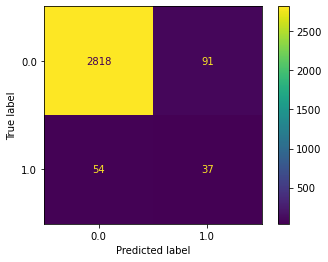

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, df_25['y_pred']);

### Classification report

In [23]:
print(classification_report(y_test, df_25['y_pred'], target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2909
           1       0.29      0.41      0.34        91

    accuracy                           0.95      3000
   macro avg       0.64      0.69      0.66      3000
weighted avg       0.96      0.95      0.96      3000

